In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('HR.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1470 non-null   int64  
 1   Attrition                1470 non-null   int64  
 2   BusinessTravel           1470 non-null   int64  
 3   DailyRate                1470 non-null   int64  
 4   Department               1470 non-null   int64  
 5   DistanceFromHome         1470 non-null   int64  
 6   EducationField           1470 non-null   float64
 7   EnvironmentSatisfaction  1470 non-null   int64  
 8   JobInvolvement           1470 non-null   int64  
 9   JobLevel                 1470 non-null   int64  
 10  JobRole                  1470 non-null   int64  
 11  JobSatisfaction          1470 non-null   int64  
 12  MaritalStatus            1470 non-null   int64  
 13  MonthlyIncome            1470 non-null   float64
 14  OverTime                

In [3]:
df.drop(['Unnamed: 0'],axis = 1,inplace = True)
df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsWithCurrManager
0,1,1,1102,2,1,1.0,2,3,2,7,4,2,5993.0,1,0,0,1,4.0,5.0
1,0,2,279,1,8,1.0,3,2,2,6,2,1,5130.0,2,1,3,3,7.0,7.0
2,1,1,1373,1,2,5.0,4,2,1,2,3,2,2090.0,1,0,3,3,0.0,0.0
3,0,2,1392,1,3,1.0,4,3,1,6,3,1,2909.0,1,0,3,3,7.0,0.0
4,0,1,591,1,2,2.0,1,3,1,2,2,1,3468.0,2,1,3,3,2.0,2.0


In [4]:
x=df.drop(['Attrition'],axis=1)
y=df.Attrition

# standard scaling

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 8)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [10]:
from sklearn.model_selection import RandomizedSearchCV
params = {'n_neighbors':range(1,100,2)}
search = RandomizedSearchCV(knn,params,cv = 10)
search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': range(1, 100, 2)})

In [11]:
search.best_estimator_

KNeighborsClassifier(n_neighbors=97)

In [12]:
knn = search.best_estimator_

In [13]:
model_knn = knn.fit(x_train,y_train)

In [14]:
y_pred = model_knn.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,roc_auc_score

In [16]:
y_pred_prob = model_knn.predict_proba(x_test)

In [17]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       294
           1       0.00      0.00      0.00         0

    accuracy                           0.85       294
   macro avg       0.50      0.43      0.46       294
weighted avg       1.00      0.85      0.92       294



C:\Users\syeda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\syeda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\syeda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])

In [19]:
area_uc = auc(fpr,tpr)
area_uc

0.6946168813119614

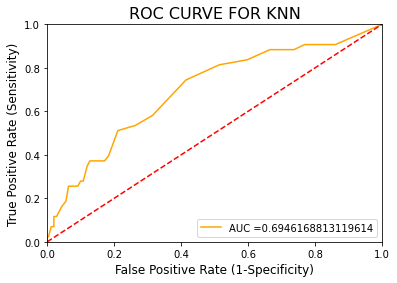

In [20]:
plt.plot(fpr,tpr,'orange',label = 'AUC ='+str(area_uc));
plt.legend(loc = 4);
plt.plot([0,1],[0,1],'--r');
plt.xlim([0,1]);
plt.ylim([0,1]);
plt.title('ROC CURVE FOR KNN',size = 16);
plt.xlabel('False Positive Rate (1-Specificity)',size = 12);
plt.ylabel('True Positive Rate (Sensitivity)',size = 12);